In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import sklearn
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


# Importing Dataset

In [2]:
df=pd.read_csv("/kaggle/input/car-data/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical variables: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
print(df.select_dtypes(include=['object']).nunique())

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64


In [11]:
#remove unnesary data
df.drop(['car_ID', 'doornumber','peakrpm','aspiration','carbody','boreratio','stroke','enginelocation','cylindernumber'], axis = 1, inplace = True)

# Data Visualisation

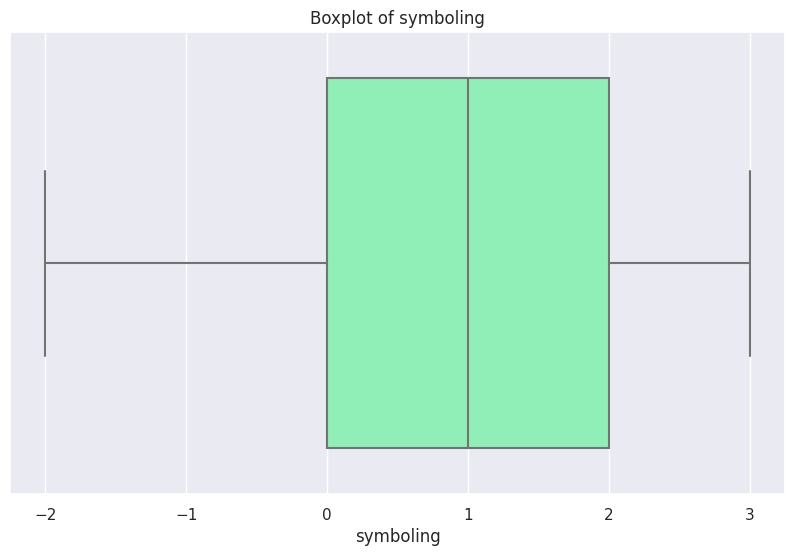

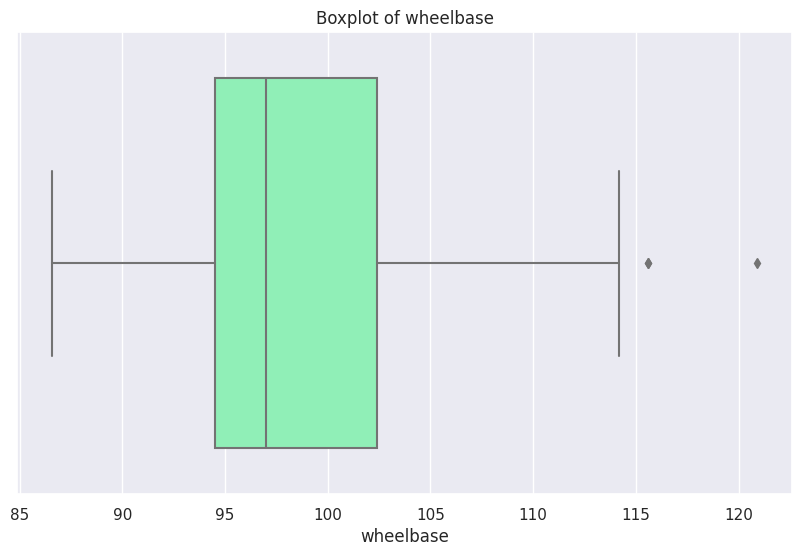

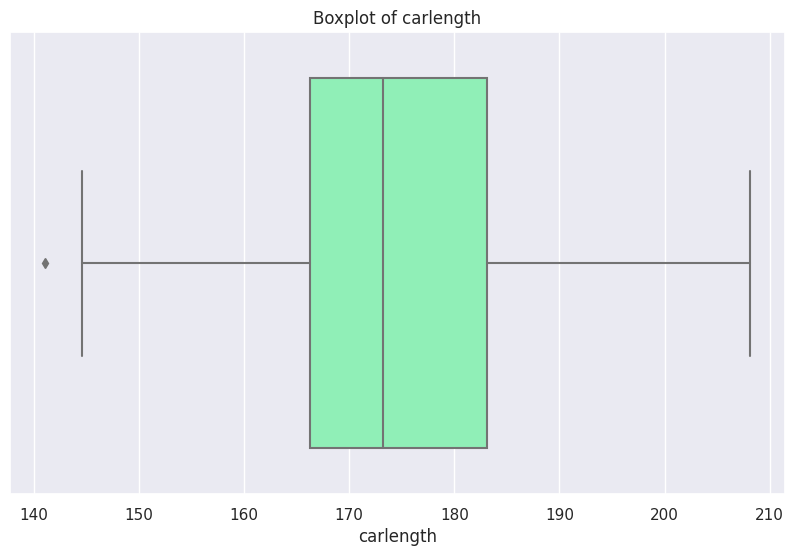

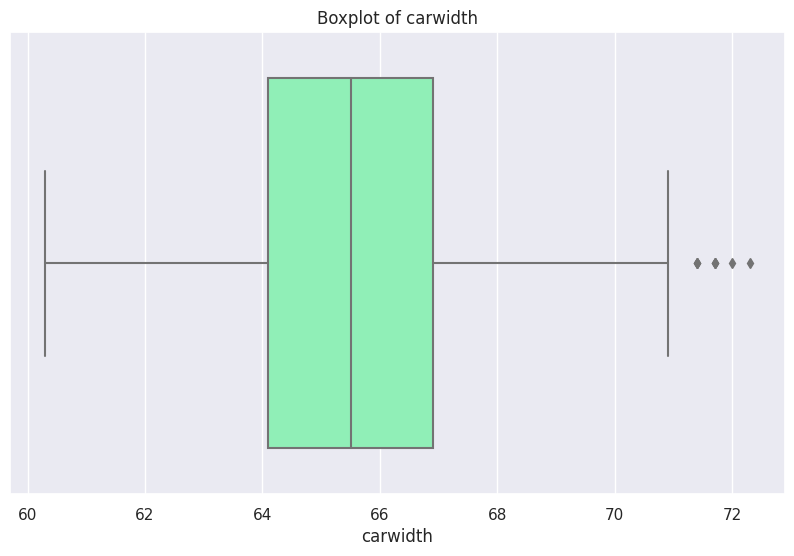

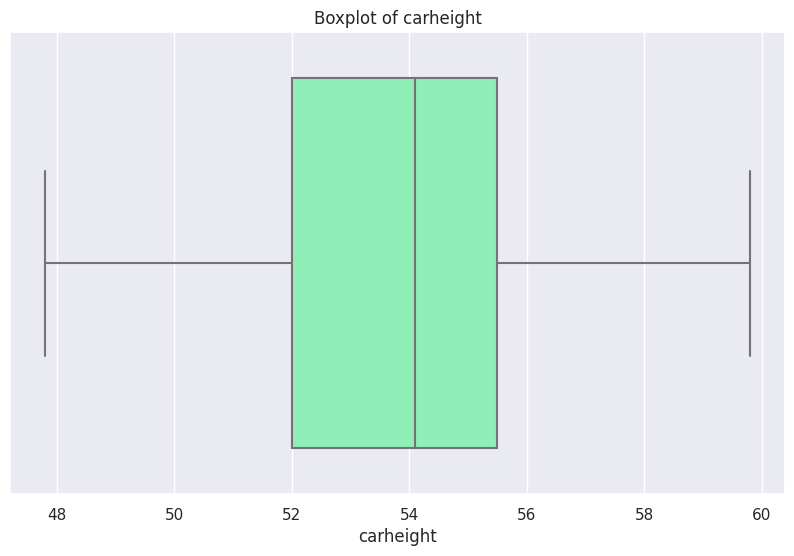

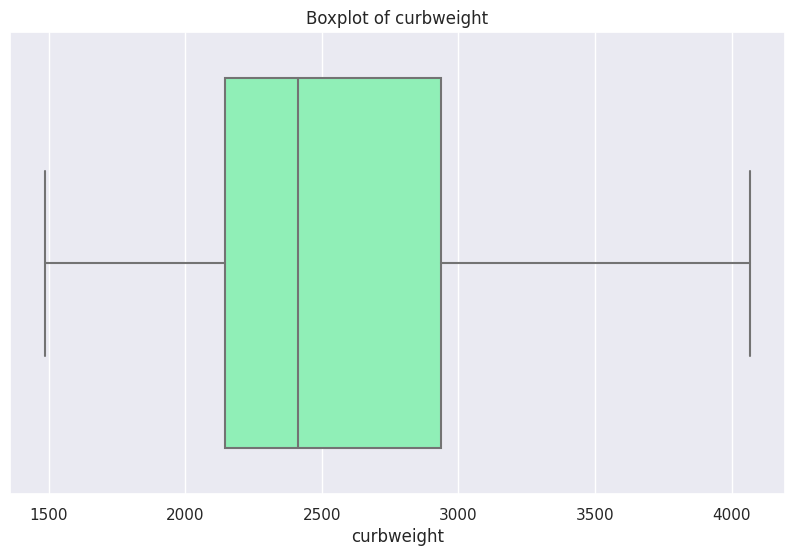

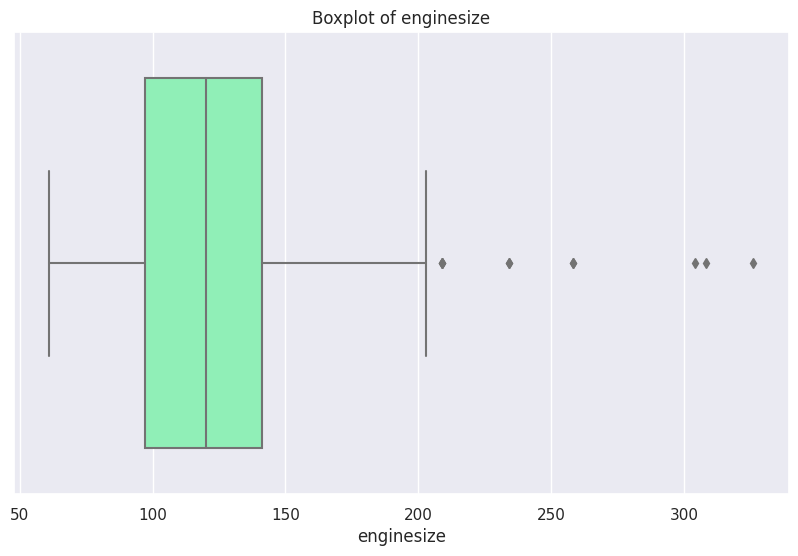

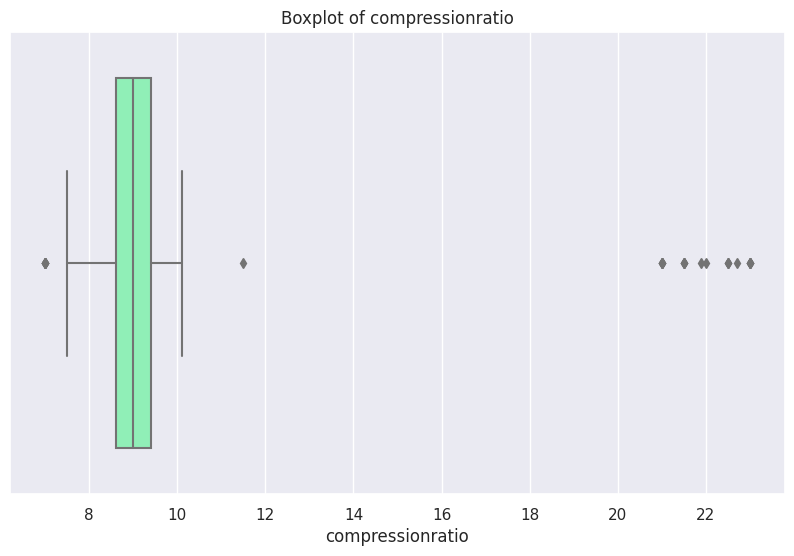

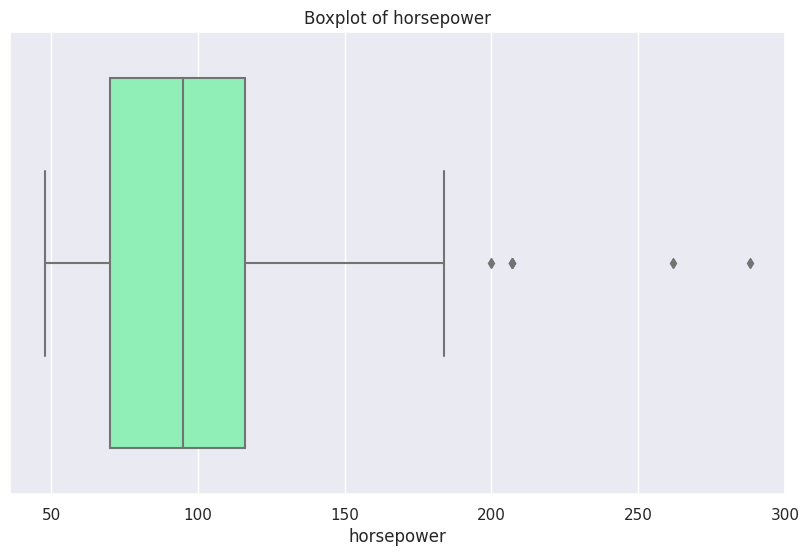

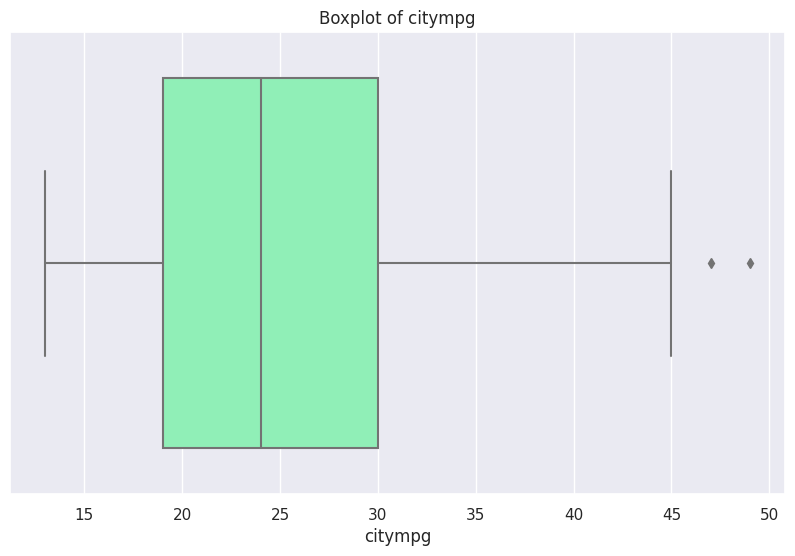

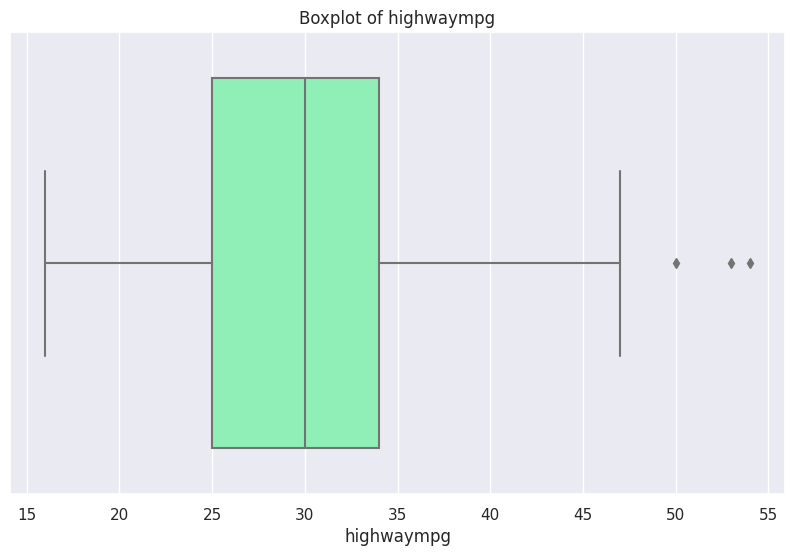

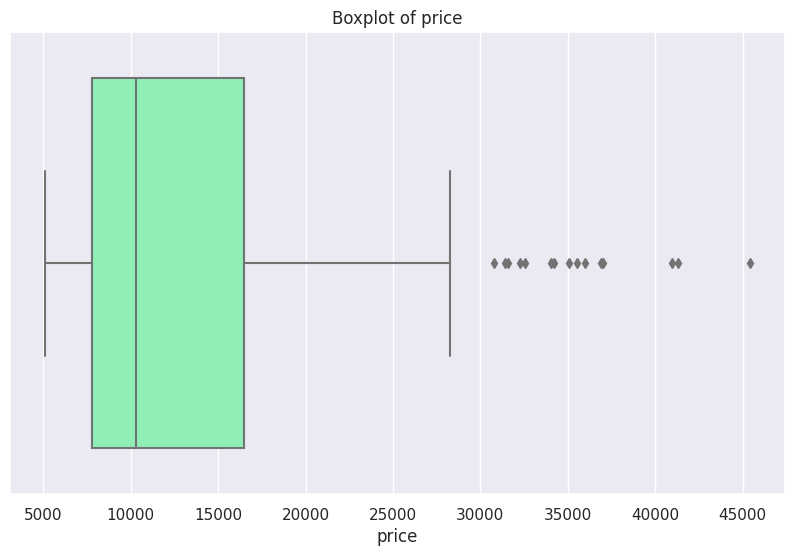

In [12]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

<Axes: xlabel='fuelsystem', ylabel='price'>

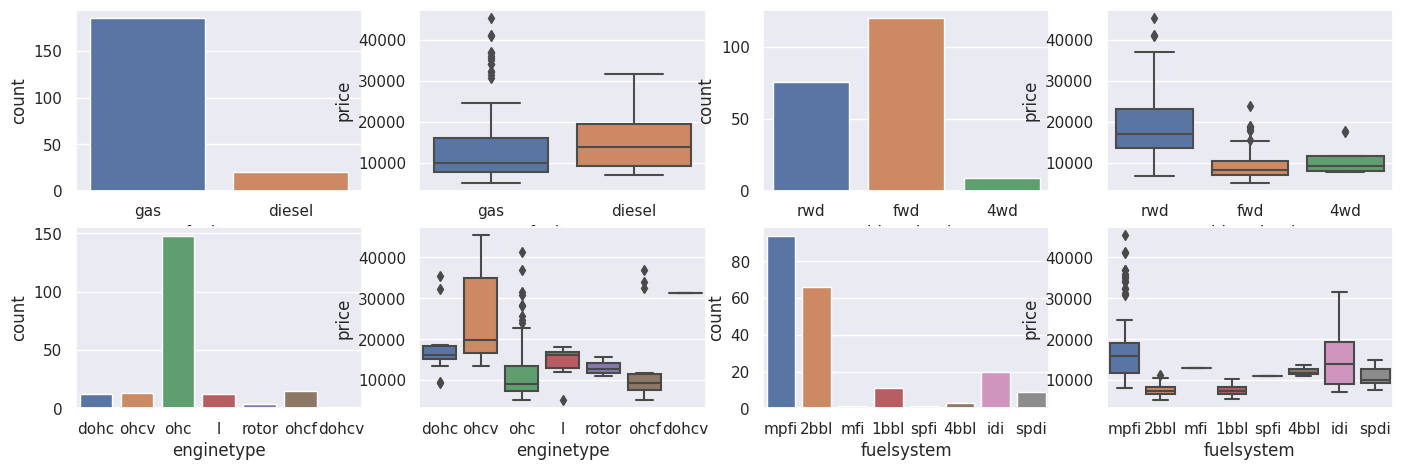

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,8))

plt.subplot(3,4,1)
sns.countplot(x=df['fueltype'])

plt.subplot(3,4,2)
sns.boxplot(x=df['fueltype'],y=df['price'])

plt.subplot(3,4,3)
sns.countplot(x=df['drivewheel'])

plt.subplot(3,4,4)
sns.boxplot(x=df['drivewheel'],y=df['price'])
plt.subplot(3,4,5)
sns.countplot(x=df['enginetype'])

plt.subplot(3,4,6)
sns.boxplot(x=df['enginetype'],y=df['price'])

plt.subplot(3,4,7)
sns.countplot(x=df['fuelsystem'])

plt.subplot(3,4,8)
sns.boxplot(x=df['fuelsystem'],y=df['price'])

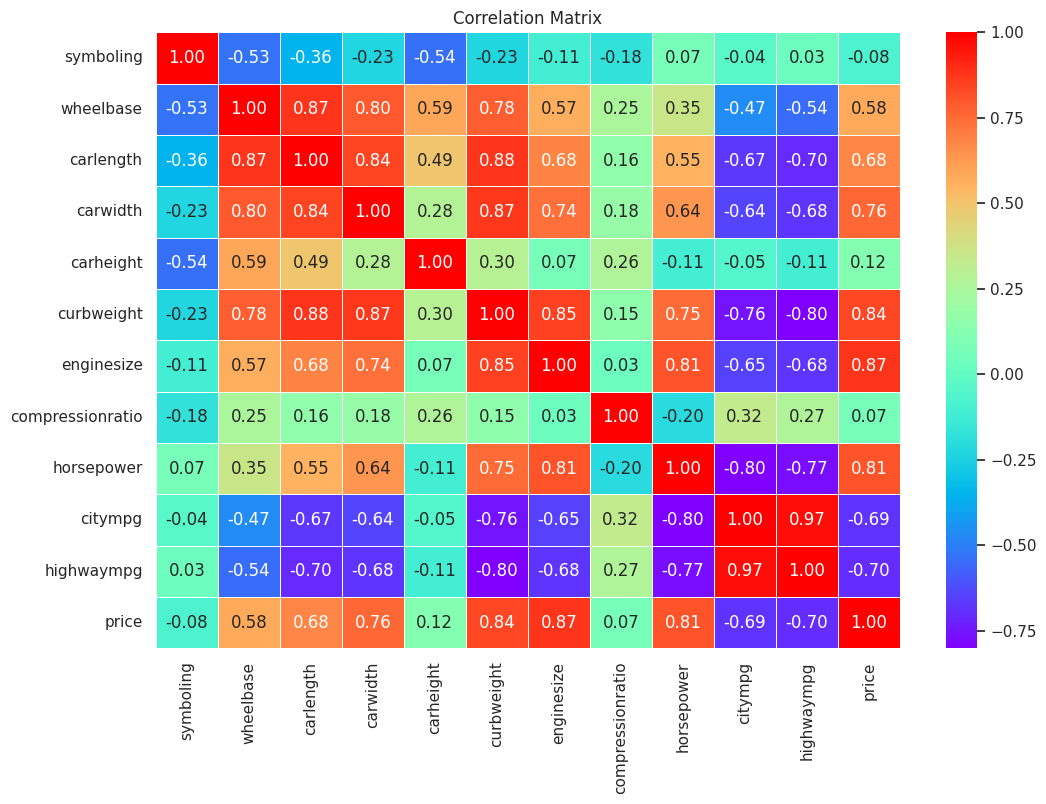

In [14]:
# Correlation matrix

numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# ML Modeling

In [15]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df.drop(['CarName'], axis = 1, inplace = True)
df['fueltype'].replace({'gas':0,'diesel':1}, inplace = True)
df['drivewheel'].replace({'rwd':0,'fwd':1,'4wd':2}, inplace = True)
df['enginetype'].replace({'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}, inplace = True)
df['fuelsystem'].replace({'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}, inplace = True)

In [17]:
x = df.drop('price', axis=1)
y = df['price']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)

In [18]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (143, 15) (143,)
Testing set shape: (62, 15) (62,)


In [19]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [20]:
Y_pred = linear.predict(X_test)
print("Accuracy Score for Test Dataset is ",linear.score(X_test, Y_test)*100,"%")
print("Accuracy Score for Train Dataset is",linear.score(X_train,Y_train)*100,"%")

Accuracy Score for Test Dataset is  81.23523251797123 %
Accuracy Score for Train Dataset is 83.68587076585227 %


In [21]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [22]:
models = {  "Linear Regression" : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "k-Neighbors Regression" : KNeighborsRegressor(),
            "Decision Tree" : DecisionTreeRegressor(),
            "Random Forest Regressor" : RandomForestRegressor(n_estimators = 100, random_state = 0),
            "XGBRegressor" : XGBRegressor()
        }

In [23]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(X_train,Y_train)

            #Make prediction:
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            #Evaluate Train and Test dataset :

            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)
            model_name = list(models.keys())[i]
           
            print(model_name)
            print()
            print("For Training set :")
            print('Root Mean Squared Error :',model_train_rmse)
            print("Mean Absolute Error : ", model_train_mae)
            print("R2 Score : ", model_train_r2)        
            print()
            print("For Testing set :")
            print('Root Mean Squared Error : ', model_test_rmse)
            print('Mean Absolute Error :  ',{model_test_mae})
            print('R2 Score : ', {model_test_r2})
            print("----------------------------------------------------")   
            print() 

Linear Regression

For Training set :
Root Mean Squared Error : 3290.665050473929
Mean Absolute Error :  2355.9789256244035
R2 Score :  0.8368587076585228

For Testing set :
Root Mean Squared Error :  3266.54480568827
Mean Absolute Error :   {2268.0292852660677}
R2 Score :  {0.8123523251797122}
----------------------------------------------------

Lasso

For Training set :
Root Mean Squared Error : 3290.7682222323588
Mean Absolute Error :  2358.5211670447898
R2 Score :  0.8368484776061753

For Testing set :
Root Mean Squared Error :  3270.8094788101425
Mean Absolute Error :   {2273.0132287553142}
R2 Score :  {0.811862034408096}
----------------------------------------------------

Ridge

For Training set :
Root Mean Squared Error : 3291.043598059094
Mean Absolute Error :  2358.130380238777
R2 Score :  0.8368211709943785

For Testing set :
Root Mean Squared Error :  3279.5078724075292
Mean Absolute Error :   {2281.5229409560566}
R2 Score :  {0.8108600352772052}
-------------------------

# Summary of the model performances:¶
**Linear Regression:** 

    Training set: RMSE: 0.0563 MAE: 0.0437 R2 Score: 0.9126 
    
    Testing set: RMSE: 0.0978 MAE: 0.0596 R2 Score: 0.8259

**Lasso Regression:**

    Training set: RMSE: 0.1898 MAE: 0.1423 R2 Score: 0.0073 
    
    Testing set: RMSE: 0.2322 MAE: 0.1604 R2 Score: 0.0197

**Ridge Regression:**

    Training set: RMSE: 0.0606 MAE: 0.0454 R2 Score: 0.8989 
    
    Testing set: RMSE: 0.1000 MAE: 0.0661 R2 Score: 0.8183

**k-Neighbors Regression:**

    Training set: RMSE: 0.0887 MAE: 0.0598 R2 Score: 0.7830 
    
    Testing set: RMSE: 0.1129 MAE: 0.0691 R2 Score: 0.7682

**Decision Tree Regression:**
    
    Training set: RMSE: 0.0 MAE: 0.0 R2 Score: 1.0 
    
    Testing set: RMSE: 0.0677 MAE: 0.0492 R2 Score: 0.9166

**Random Forest Regression:**
    
    Training set: RMSE: 0.0204 MAE: 0.0129 R2 Score: 0.9885 
    
    Testing set: RMSE: 0.0517 MAE: 0.0357 R2 Score: 0.9513

**AdaBoost Regression:**
    
    Training set: RMSE: 0.0393 MAE: 0.0334 R2 Score: 0.9575 
    
    Testing set: RMSE: 0.0685 MAE: 0.0526 R2 Score: 0.9148

**XGBRegressor:**
    
    Training set: RMSE: 0.0013 MAE: 0.0009 R2 Score: 0.9999 
    
    Testing set: RMSE: 0.0586 MAE: 0.0413 R2 Score: 0.9375

## Summary:
1. The performance of various regression models on the dataset was evaluated. 
2. Linear Regression, Ridge Regression, Random Forest Regression, and XGBRegressor showed strong performance on both training and testing sets, with low RMSE and MAE, and high R2 Score. 
3. In contrast, Lasso Regression performed poorly on both sets, suggesting it may not be suitable for this dataset. 
4. Decision Tree Regression performed exceptionally well on the training set but struggled on the testing set, indicating potential overfitting. 
5. AdaBoost Regression performed well on the training set but slightly worse on the testing set, indicating some overfitting but still decent performance.
